In [1]:
import json
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl

# mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams["axes.labelsize"] = 24
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.titlesize'] = 24
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
COLORS = ["tab:blue", "orangered", "tab:green", "tab:purple"]

def create_axes(axes, exp_name, color, dataset, metrics, seeds):
    # derive steps from config.
    log_dir = f"../logs/{dataset}"
    with open(os.path.join(log_dir, f'{exp_name}/{seeds[0]}/config.json'), "r") as f:
        config = json.load(f)
    eval_interval, max_iters = config['training']['eval_interval'], config['training']['max_iters']
    steps = np.arange(eval_interval, max_iters + 1, eval_interval)

    # get performances for different seeds
    all_train = {metric: np.zeros(len(steps)) for metric in metrics}
    all_validation = {metric: np.zeros(len(steps)) for metric in metrics}
    for seed in seeds:
        train = {metric: [] for metric in metrics}
        validation = {metric: [] for metric in metrics}
        for step in steps:
            with open(os.path.join(log_dir, f'{exp_name}/{seed}/step_{step}.json'), "r") as f:
                res = json.load(f)
            for metric in metrics:
                train[metric].append(res[f'train_{metric}'])
                validation[metric].append(res[f'validation_{metric}'])
                if metric == "variance":
                    train[metric][-1] /= train[metric][0]
                    validation[metric][-1] /= validation[metric][0]
        for i, metric in enumerate(metrics):
            all_train[metric] += np.array(train[metric]) / len(seeds)
            all_validation[metric] += np.array(validation[metric]) / len(seeds)
            axes[0, i].plot(steps, train[metric], alpha=0.3, linewidth=1, color=color)
            axes[1, i].plot(steps, validation[metric], alpha=0.3, linewidth=1, color=color)

    for i, metric in enumerate(metrics):
        axes[0, i].plot(steps, all_train[metric], linewidth=2, label=exp_name, color=color)
        axes[1, i].plot(steps, all_validation[metric], linewidth=2, label=exp_name, color=color)

def create_fig(dataset, exp_names, metrics=["loss", "accuracy", "variance", "avg_precision", "avg_recall"], seeds=[1, 2, 3, 4, 5]):
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, len(metrics), figsize = (5 * len(metrics), 8))
    axes[0, 0].set_ylabel("Train")
    axes[1, 0].set_ylabel("Validation")

    for i, exp_name in enumerate(exp_names):
        create_axes(axes, exp_name, COLORS[i], dataset, metrics, seeds)

    for i, metric in enumerate(metrics):
        axes[0, i].set_title(metric)
        if metric in ["variance", "loss"]:
            axes[0, i].set_yscale("log")
            axes[1, i].set_yscale("log")
    axes[1, -1].legend()
    fig.suptitle(dataset, fontsize=28)
    plt.show()

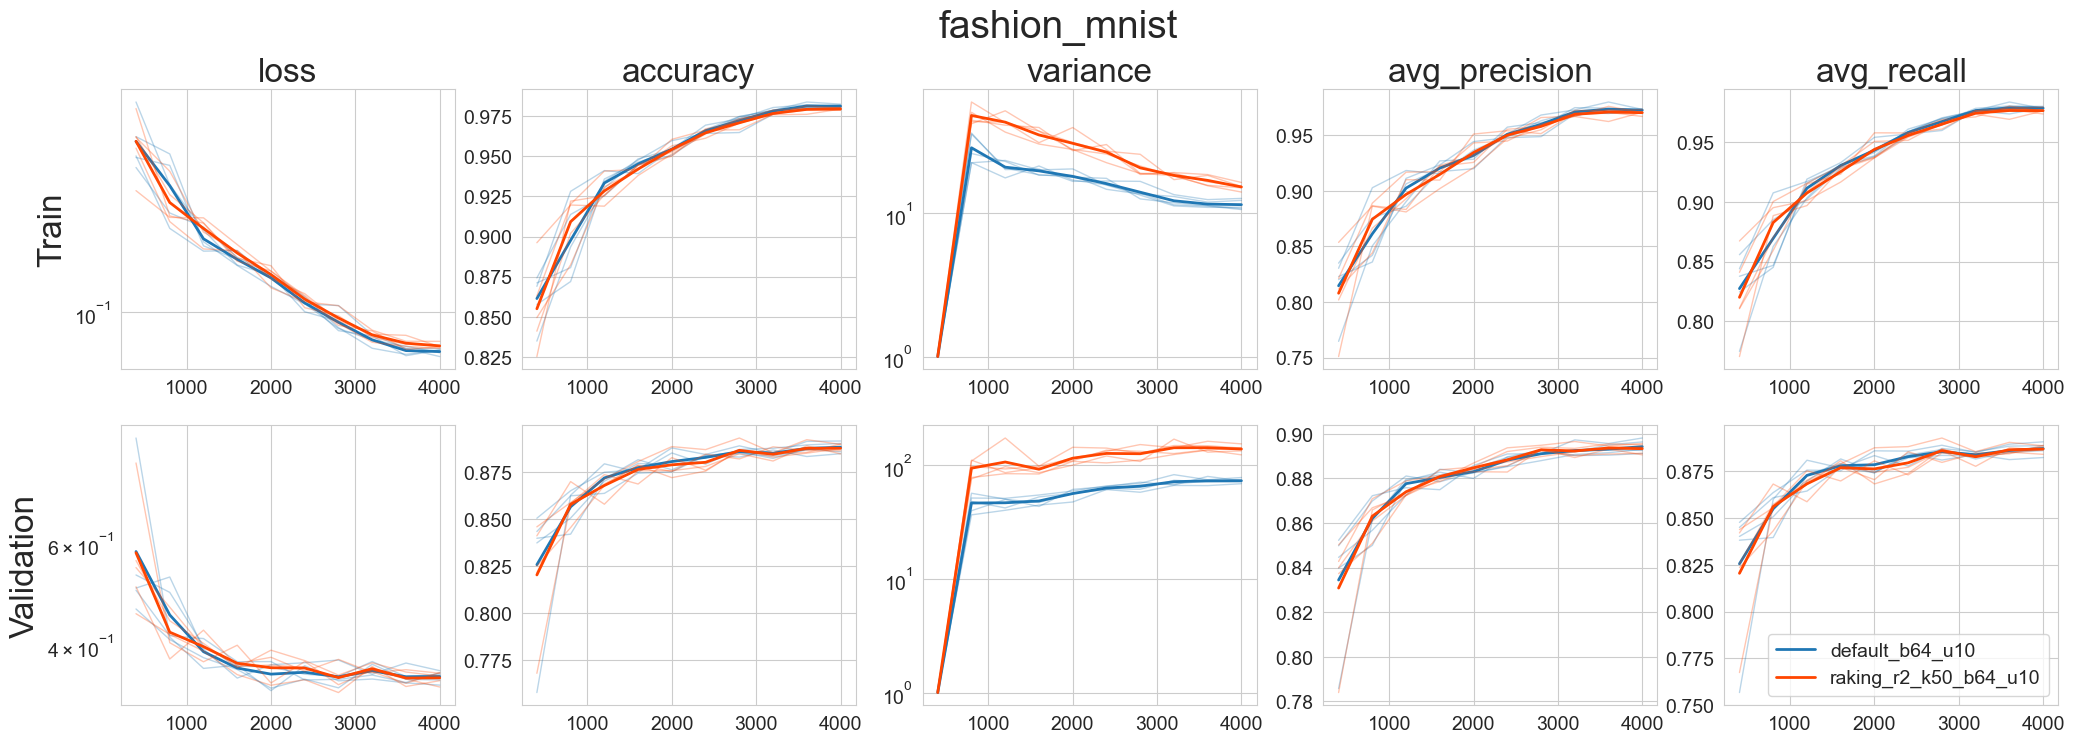

In [7]:
dataset = "fashion_mnist"
exp_names = [
    "default_b64_u10",
    "raking_r2_k50_b64_u10",
]

create_fig(dataset, exp_names)

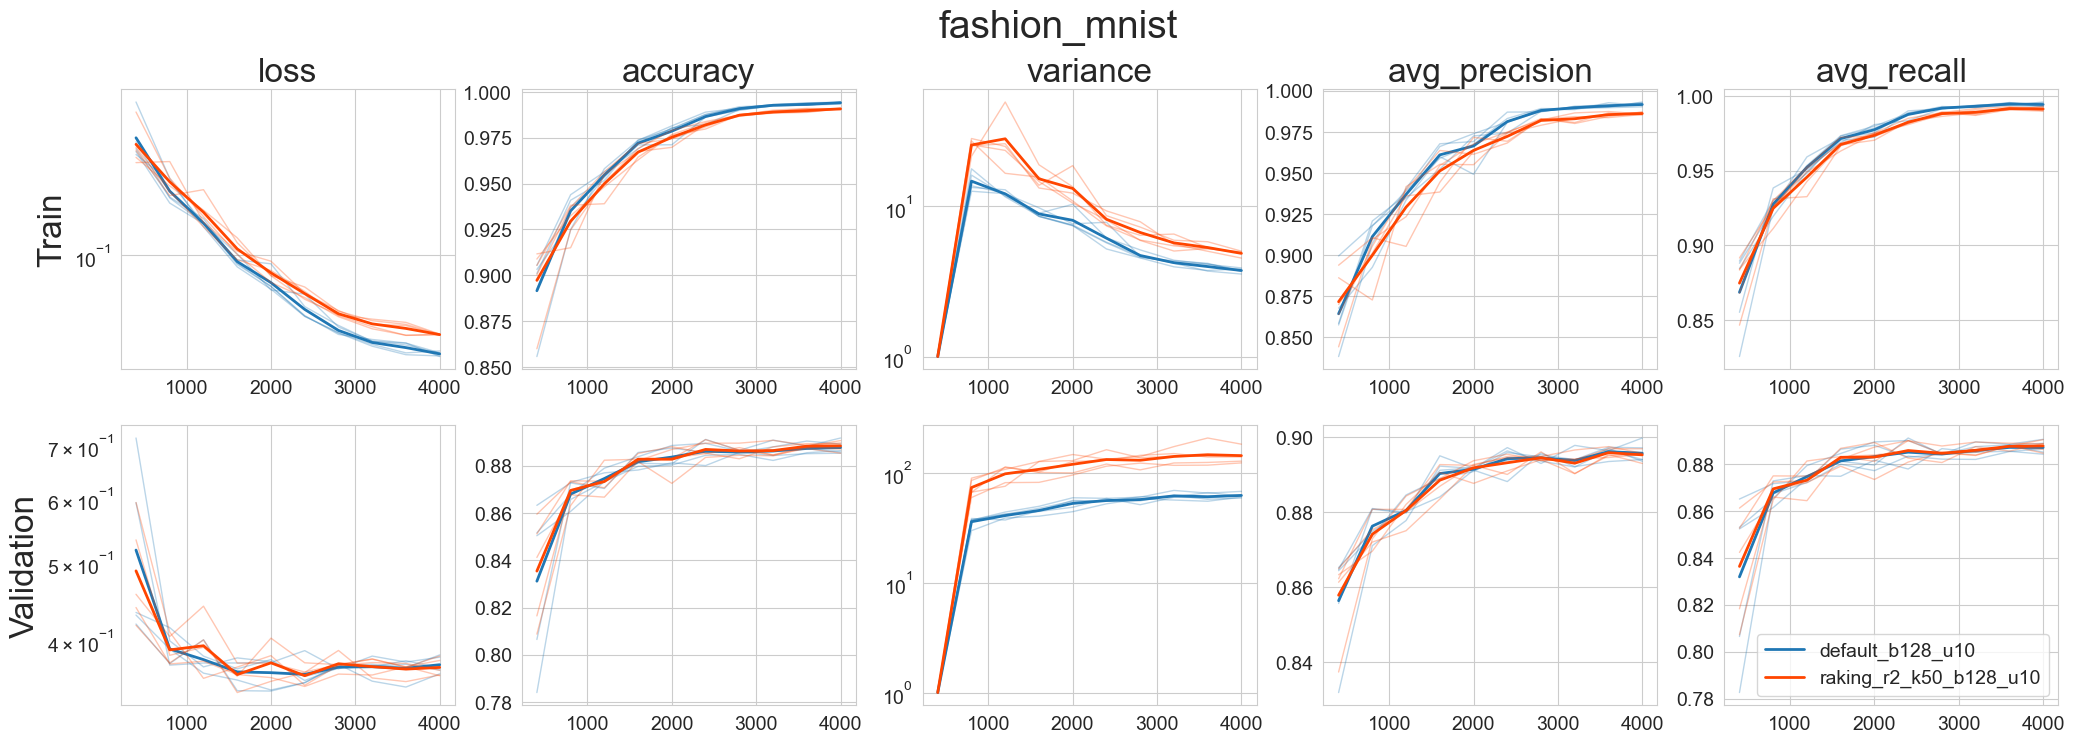

In [8]:
dataset = "fashion_mnist"
exp_names = [
    "default_b128_u10",
    "raking_r2_k50_b128_u10",
]

create_fig(dataset, exp_names)

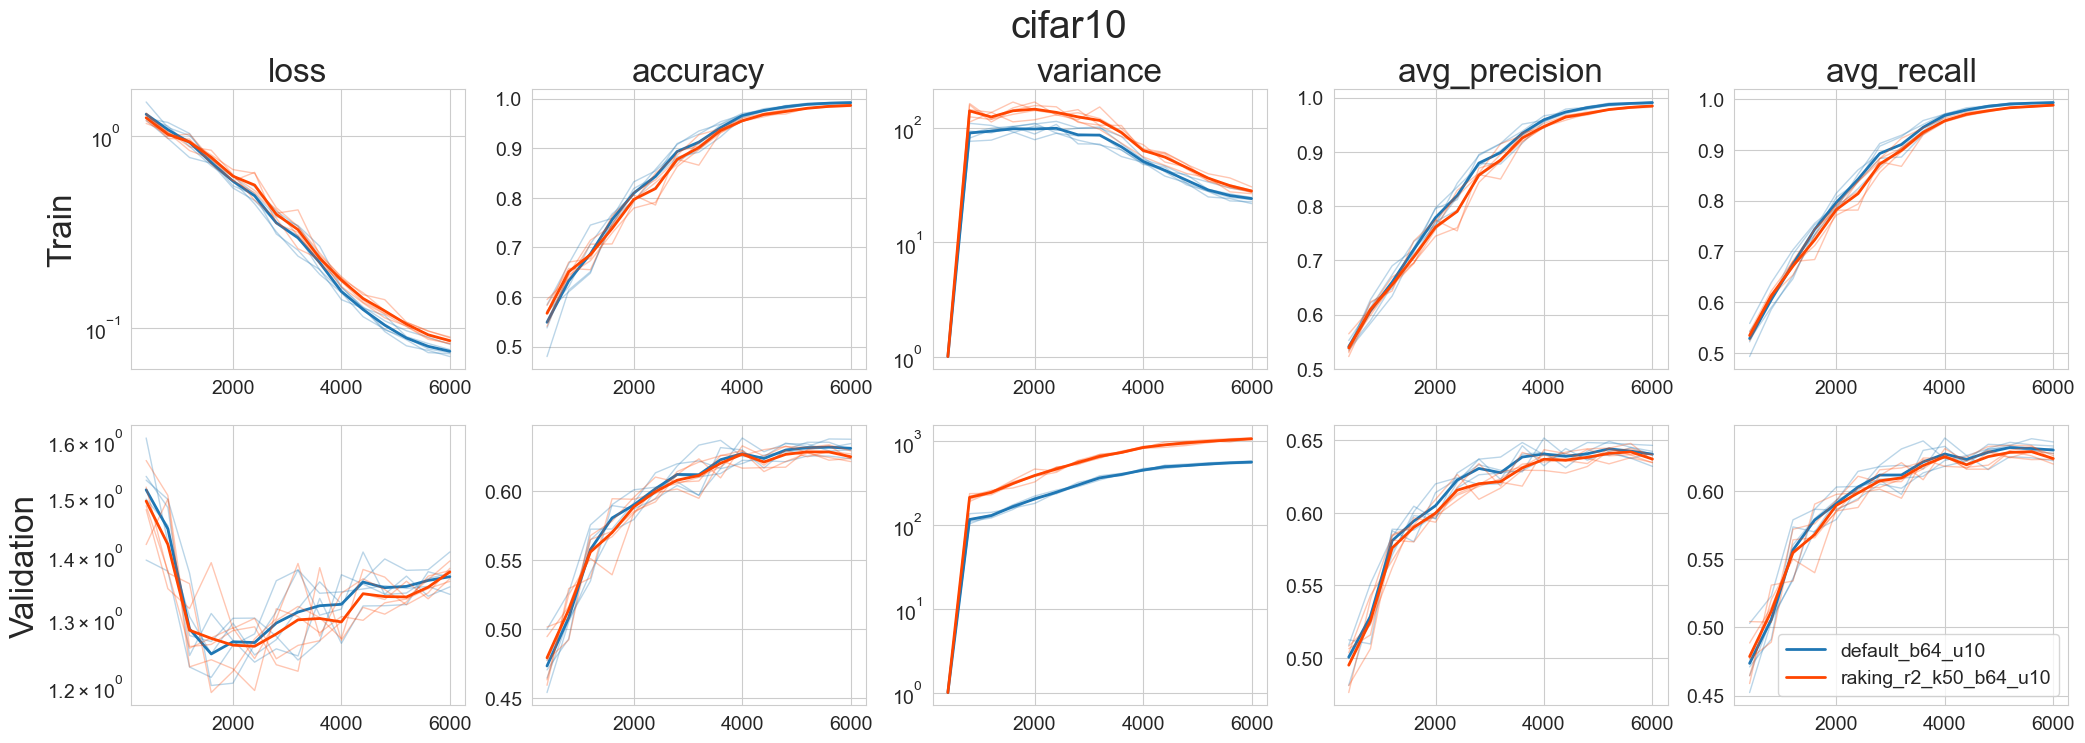

In [9]:
dataset = "cifar10"
exp_names = [
    "default_b64_u10",
    "raking_r2_k50_b64_u10",
]

create_fig(dataset, exp_names)

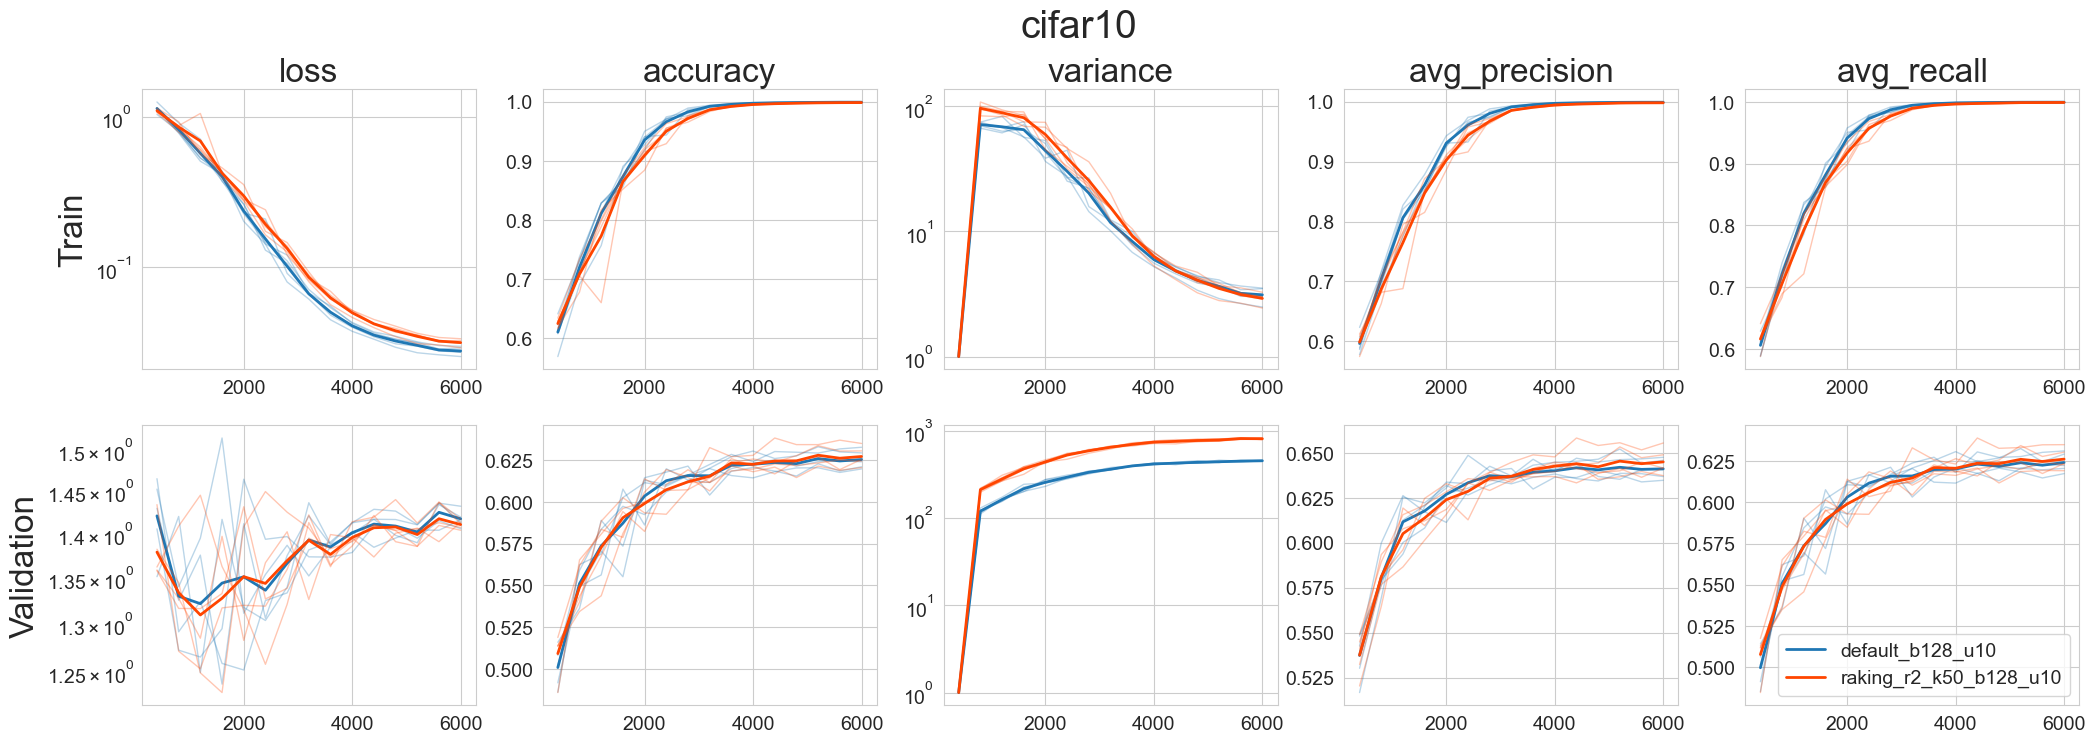

In [10]:
dataset = "cifar10"
exp_names = [
    "default_b128_u10",
    "raking_r2_k50_b128_u10",
]

create_fig(dataset, exp_names)

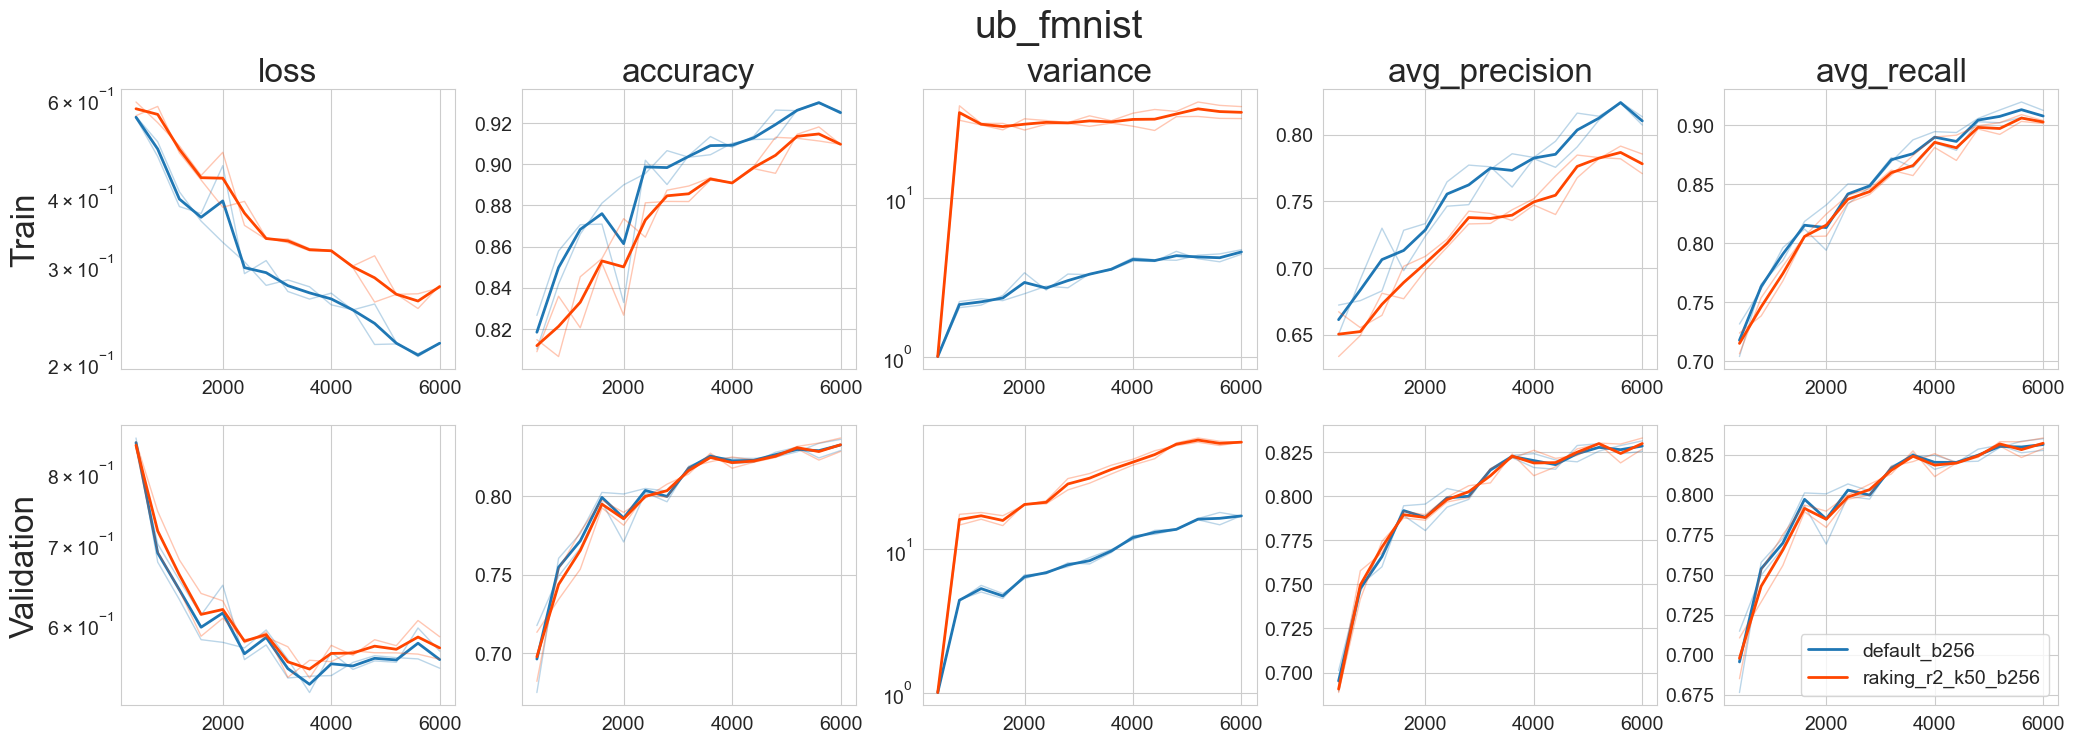

In [11]:
dataset = "ub_fmnist"
exp_names = [
    "default_b256",
    "raking_r2_k50_b256",
]

create_fig(dataset, exp_names, seeds=[1, 2])